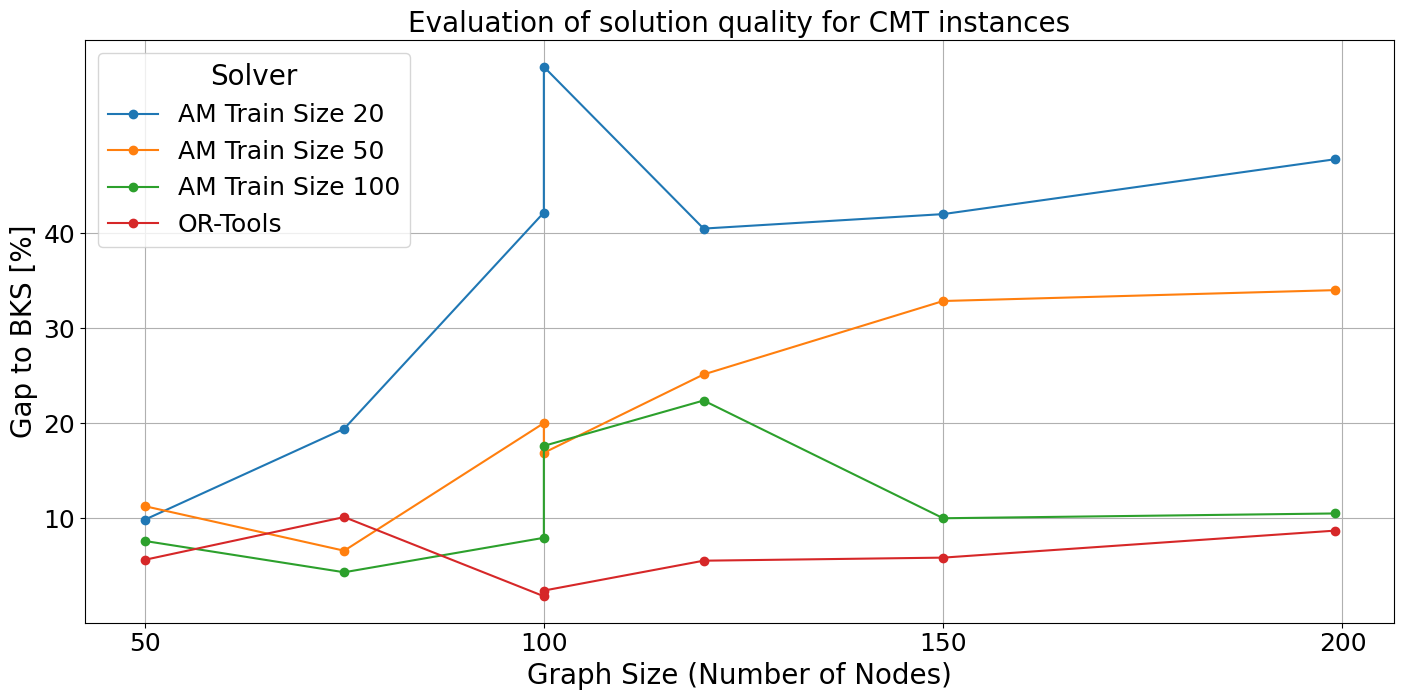

In [12]:
# Visualisierung der Gaps pro CMT-Instanz und Trainingsgröße

import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Beispiel: JSON-Daten einfügen (hier als String, du kannst sie auch aus Datei laden)
with open("C:\\Users\\Martin\\Documents\\Studium\\Angewandtes Wissenschaftliches Arbeiten\\attention-learn-to-route\\analysis\\cmt_summary.json", "r", encoding="utf-8") as f:
    json_data = f.read()
data = json.loads(json_data)

CMT_INFO = {
    'cmt01': {'size': 50, 'bks': 524.61, 'vehicles': 5},
    'cmt02': {'size': 75, 'bks': 835.26, 'vehicles': 10},
    'cmt03': {'size': 100, 'bks': 826.14, 'vehicles': 8},
    'cmt04': {'size': 150, 'bks': 1028.42, 'vehicles': 12},
    'cmt05': {'size': 199, 'bks': 1291.29, 'vehicles': 16},
    'cmt11': {'size': 120, 'bks': 1042.11, 'vehicles': 7},
    'cmt12': {'size': 100, 'bks': 819.56, 'vehicles': 10},
}

# Einheitliche Farben
palette = sns.color_palette("tab10")

# # Plot 1: Einzelplots für jede CMT-Instanz
# for cmt, results in data.items():
#     train_sizes = []
#     gaps = []
#     for key in sorted(results.keys()):
#         entry = results[key][0]
#         train_sizes.append(key.replace("train", "").replace("cvrp_", "").replace("sdvrp_", ""))
#         gaps.append(entry["gap_to_bks"])

#     plt.figure(figsize=(8, 5))
#     sns.barplot(x=train_sizes, y=gaps, palette=palette)
#     plt.title(f"{cmt.upper()} – Gap to BKS by Training Size")
#     plt.ylabel("Gap to BKS [%]")
#     plt.xlabel("Training Size")
#     plt.tight_layout()
#     plt.show()

# Plot 2: Vergleichsplot – alle CMTs nach Graphgröße
train_labels = ["AM Train Size 20", "AM Train Size 50", "AM Train Size 100", "OR-Tools"]
train_keys = [
    ("cvrp_train20", "sdvrp_train20"),
    ("cvrp_train50", "sdvrp_train50"),
    ("cvrp_train100", "sdvrp_train100"),
    ("ortools", "ortools")
]

# CMTs sortieren nach Graphgröße
sorted_cmts = sorted(CMT_INFO.items(), key=lambda x: x[1]['size'])



plt.figure(figsize=(14, 7))

for i, (train_key_cvrp, train_key_sdvrp) in enumerate(train_keys):
    x = []
    y = []
    #labels = []
    for cmt, info in sorted_cmts:
        # if train_key_cvrp in data[cmt]:
        #     gap = data[cmt][train_key_cvrp][0]["gap_to_bks"]
        if train_key_sdvrp in data[cmt]:
            gap = data[cmt][train_key_sdvrp][0]["gap_to_bks"]
        else:
            gap = None
        if gap is not None:
            x.append(info['size'])
            y.append(gap)
            #labels.append(cmt)
    
   
    plt.plot(x, y, marker='o', label=train_labels[i])
    # Punktbeschriftung
    #for xi, yi, label in zip(x, y, labels):
    #    plt.text(xi + 1, yi + 0.5, label, fontsize=8)
# Schritt 1: Gruppiere CMTs nach Graphgröße
size_to_cmts = defaultdict(list)
for cmt, info in sorted_cmts:
    size_to_cmts[info['size']].append(cmt.upper())

# # Schritt 2: Ein Kreuz und Label pro Größe zeichnen
# for size, cmts in size_to_cmts.items():
#     label = "+".join(cmts)
#     plt.scatter(size, 40.0, marker='x', color='black')
#     plt.text(size, 45, label, ha='center', va='top', fontsize=20)

plt.title("Evaluation of solution quality for CMT instances", fontsize=20)
plt.xlabel("Graph Size (Number of Nodes)", fontsize=20)
plt.ylabel("Gap to BKS [%]", fontsize=20)
plt.legend(title="Solver", fontsize=18, title_fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.xticks([ 50, 100, 150, 200], fontsize=18)
plt.yticks([10,20,30,40],fontsize=18)
plt.savefig("gap_comparison_by_graph_size.png", dpi=300)


plt.show()


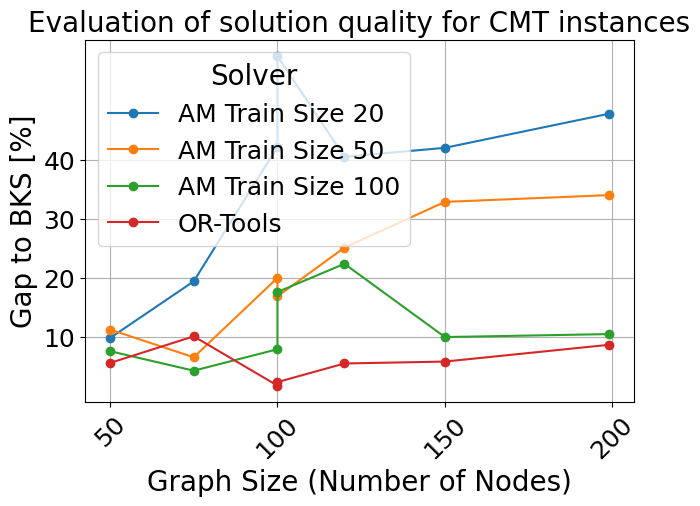

In [11]:
for i, (train_key_cvrp, train_key_sdvrp) in enumerate(train_keys):
    x = []
    y = []
    #labels = []
    for cmt, info in sorted_cmts:
        
        if train_key_sdvrp in data[cmt]:
            gap = data[cmt][train_key_sdvrp][0]["gap_to_bks"]
        else:
            gap = None
        if gap is not None:
            x.append(info['size'])
            y.append(gap)
            #labels.append(cmt)
    
   
    plt.plot(x, y, marker='o', label=train_labels[i])
    # Punktbeschriftung
    #for xi, yi, label in zip(x, y, labels):
    #    plt.text(xi + 1, yi + 0.5, label, fontsize=8)
# Schritt 1: Gruppiere CMTs nach Graphgröße
size_to_cmts = defaultdict(list)
for cmt, info in sorted_cmts:
    size_to_cmts[info['size']].append(cmt.upper())

# # Schritt 2: Ein Kreuz und Label pro Größe zeichnen
# for size, cmts in size_to_cmts.items():
#     label = "+".join(cmts)
#     plt.scatter(size, 40.0, marker='x', color='black')
#     plt.text(size, 45, label, ha='center', va='top', fontsize=20)

plt.title("Evaluation of solution quality for CMT instances", fontsize=20)
plt.xlabel("Graph Size (Number of Nodes)", fontsize=20)
plt.ylabel("Gap to BKS [%]", fontsize=20)
plt.legend(title="Solver", fontsize=18, title_fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.xticks([ 50, 100, 150, 200], fontsize=18, rotation=45)
plt.yticks([10,20,30,40],fontsize=18)
plt.savefig("gap_comparison_by_graph_size.png", dpi=300)


plt.show()
